In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(label_batch.numpy())

(256, 256, 3)
[2 0 2 0 0 1 1 0 0 1 0 0 0 0 0 2 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0]


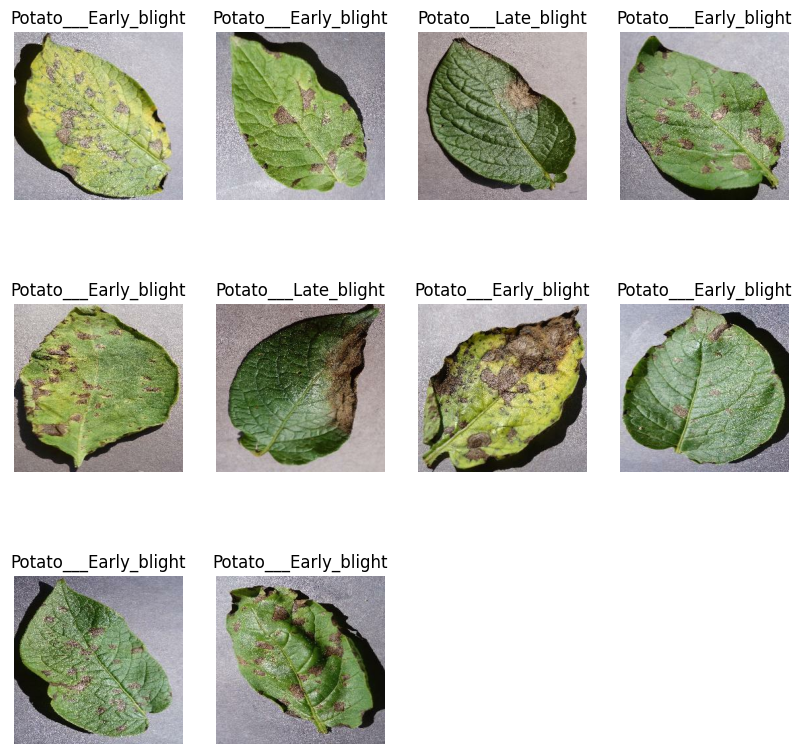

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(10):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
len(dataset)

68

In [8]:
train_size=0.8
len(dataset)*train_size 

54.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [11]:
68/10

6.8

In [12]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2 )
])

In [22]:
CHANNELS=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [25]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 70s 601ms/step - loss: 0.8883 - accuracy: 0.5324 - val_loss: 0.7556 - val_accuracy: 0.6667
Epoch 2/50
54/54 [==============================] - 15s 277ms/step - loss: 0.5815 - accuracy: 0.7633 - val_loss: 0.4651 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 15s 280ms/step - loss: 0.3962 - accuracy: 0.8206 - val_loss: 0.3358 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 15s 277ms/step - loss: 0.2858 - accuracy: 0.8773 - val_loss: 0.3299 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 15s 269ms/step - loss: 0.2659 - accuracy: 0.8929 - val_loss: 0.3156 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 15s 274ms/step - loss: 0.2216 - accuracy: 0.9115 - val_loss: 0.3768 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 15s 282ms/step - loss: 0.1677 - accuracy: 0.9329 - val_loss: 0.4052 - val_accuracy: 0.8906

54/54 [==============================] - 16s 300ms/step - loss: 0.0671 - accuracy: 0.9728 - val_loss: 0.1374 - val_accuracy: 0.9635
Epoch 42/50
54/54 [==============================] - 16s 288ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.1188 - val_accuracy: 0.9792
Epoch 43/50
54/54 [==============================] - 16s 290ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.2192 - val_accuracy: 0.9479
Epoch 44/50
54/54 [==============================] - 15s 277ms/step - loss: 0.0485 - accuracy: 0.9826 - val_loss: 0.1884 - val_accuracy: 0.9531
Epoch 45/50
54/54 [==============================] - 15s 268ms/step - loss: 0.0249 - accuracy: 0.9907 - val_loss: 0.0997 - val_accuracy: 0.9740
Epoch 46/50
54/54 [==============================] - 15s 279ms/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0831 - val_accuracy: 0.9740
Epoch 47/50
54/54 [==============================] - 15s 273ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.1873 - val_accuracy: 0.9531
Epoc

In [26]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 2s 36ms/step - loss: 0.1295 - accuracy: 0.9492


In [27]:
scores

[0.12950563430786133, 0.94921875]

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


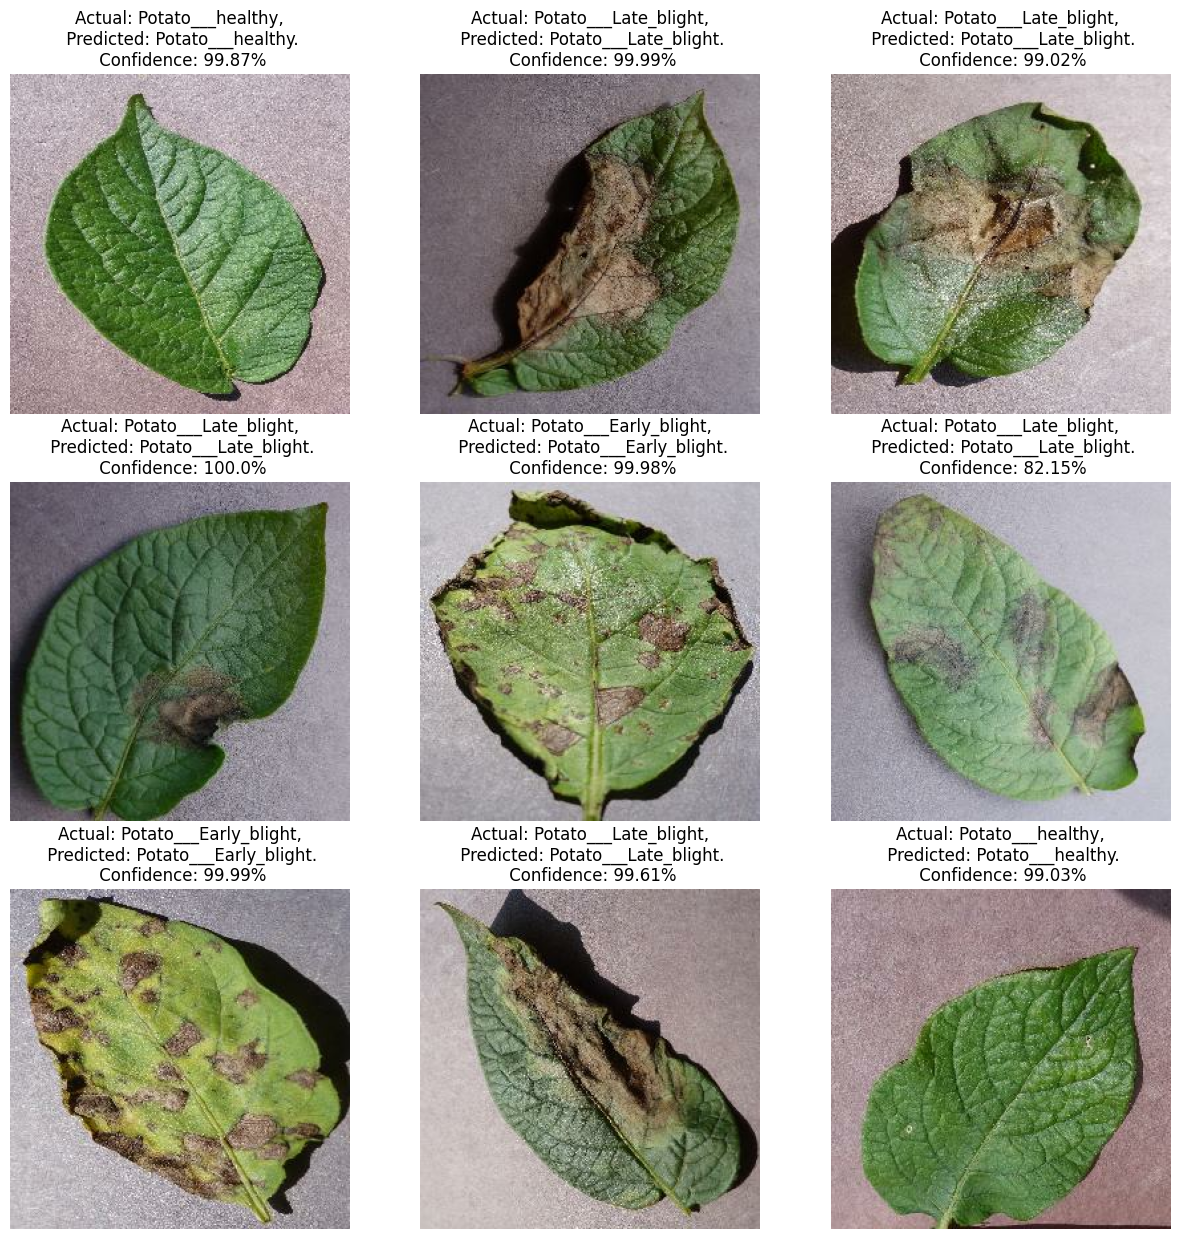

In [32]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

model_version=1
model.save(f'./models/{model_version}')

In [33]:
import pickle 
with open('leaf_dis.pkl','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://6045e16f-b02c-422e-b7be-8864dc554988/assets


INFO:tensorflow:Assets written to: ram://6045e16f-b02c-422e-b7be-8864dc554988/assets


In [2]:
import pickle
with open('leaf_dis.pkl','rb') as f:
    model=pickle.load(f) 

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://7ebdda47-ef71-4571-b0c7-e66da5ae24a1/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [4]:
path='leaf_dis.pkl'
p=r'C:\Users\praka\Downloads\late_blight_1.jpg'
model = pickle.load(open(path, 'rb'))
model.predict(p)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://09404673-f0b0-40f3-a55d-dd054980dea9/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [9]:
import tensorflow as tf
path = r'http://localhost:8888/edit/Deep_Learning_tuorial/leaf_dis.pkl'
# model.save(path )
loaded_model= tf.keras.models.load_model(path,'rb' )

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [10]:
import os 
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
filename = open("./leaf_dis.pkl", "rb")
mdl = pickle.load(filename)


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://29cb36c6-bad8-45b3-a95c-d8dc6eb65309/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [1]:
import tensorflow as tf
MODEL = tf.keras.models.load_model(r"C:\Users\praka\Deep_Learning_tuorial\models\1")

In [3]:
MODEL.predict('late_blight_1.jpg')

IndexError: tuple index out of range

In [12]:
import cv2
img=cv2.imread('late_blight_1.jpg')
img=cv2.resize(img,(256,256))
print(img)


[[[  3  96  70]
  [  2  91  66]
  [  2  95  70]
  ...
  [  4 136  94]
  [  6 135  95]
  [ 11 139  98]]

 [[  2  94  69]
  [  0  93  68]
  [  3  96  71]
  ...
  [  0 130  88]
  [  5 132  92]
  [  8 141 102]]

 [[  2 101  73]
  [  1  95  71]
  [  0 100  72]
  ...
  [  3 126  86]
  [  2 128  91]
  [  0 134  94]]

 ...

 [[ 19  63  51]
  [ 19  59  49]
  [ 21  58  51]
  ...
  [ 19  43  39]
  [ 12  38  34]
  [ 16  40  36]]

 [[ 19  58  48]
  [ 18  58  47]
  [ 18  52  45]
  ...
  [ 18  42  38]
  [ 14  39  35]
  [ 13  37  33]]

 [[ 18  56  46]
  [ 16  49  43]
  [ 19  47  41]
  ...
  [ 16  43  39]
  [ 12  43  38]
  [ 15  38  34]]]


In [13]:
import numpy as np
import pandas as pd
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array)

tf.Tensor(
[[[[  3.  96.  70.]
   [  2.  91.  66.]
   [  2.  95.  70.]
   ...
   [  4. 136.  94.]
   [  6. 135.  95.]
   [ 11. 139.  98.]]

  [[  2.  94.  69.]
   [  0.  93.  68.]
   [  3.  96.  71.]
   ...
   [  0. 130.  88.]
   [  5. 132.  92.]
   [  8. 141. 102.]]

  [[  2. 101.  73.]
   [  1.  95.  71.]
   [  0. 100.  72.]
   ...
   [  3. 126.  86.]
   [  2. 128.  91.]
   [  0. 134.  94.]]

  ...

  [[ 19.  63.  51.]
   [ 19.  59.  49.]
   [ 21.  58.  51.]
   ...
   [ 19.  43.  39.]
   [ 12.  38.  34.]
   [ 16.  40.  36.]]

  [[ 19.  58.  48.]
   [ 18.  58.  47.]
   [ 18.  52.  45.]
   ...
   [ 18.  42.  38.]
   [ 14.  39.  35.]
   [ 13.  37.  33.]]

  [[ 18.  56.  46.]
   [ 16.  49.  43.]
   [ 19.  47.  41.]
   ...
   [ 16.  43.  39.]
   [ 12.  43.  38.]
   [ 15.  38.  34.]]]], shape=(1, 256, 256, 3), dtype=float32)


In [19]:
pred=MODEL.predict(img_array)
new_pred=np.argmax(pred)

1/1 [==============================] - 0s 20ms/step


In [15]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
class_names[new_pred]

'Potato___Late_blight'

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [9]:
import cv2
import numpy
img=cv2.imread('late_blight_1.jpg')
img2=cv2.resize(img,(256,256))
# MODEL.predict(img2)
img_array = tf.keras.preprocessing.image.img_to_array(img2.numpy())
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'